# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least two datasets** on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
# I will be analyzing and visualizing the relationship between population density of a county
# and the 2020 election results to see how much population density affects a person's vote.
# There is frequent discussion about the urban/rural and red state/blue state divide.
# Which is more telling? The state you live in, region you live in, or the type of area you 
# live (urban vs. rural). This will take a look into it!

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

# Import the data here:
pop_data = pd.read_csv(r'Average_Household_Size_and_Population_Density_by_County.csv', dtype={'GEOID':'string'})

# Remove columns that are not part of analysis:
pop_data.drop(['COUNTYNS','B25010_001E', 'AWATER', 'B25010_001M', 'B25010_002E', 'B25010_002M',
       'B25010_003E', 'B25010_003M', 'B01001_001M','created_user', 'created_date',
       'last_edited_user', 'last_edited_date','SHAPE_Length', 'SHAPE_Area', 'B01001_calc_PopDensity', 'B01001_calc_PopDensityM'],axis=1,inplace=True)
#print(pop_data.columns)

# converting area from sq. meters to sq. miles
pop_data.ALAND = pop_data.ALAND * 10.76391 / 27878400

pop_data.rename({'ALAND':'land_area_sq_miles','B01001_001E':'population'}, axis=1, inplace=True)

pop_data.head()

,OBJECTID,GEOID,land_area_sq_miles,NAME,State,population
0,1,01001,594.443680,Autauga County,Alabama,55200
1,2,01003,1589.793598,Baldwin County,Alabama,208107
2,3,01005,885.001965,Barbour County,Alabama,25782
3,4,01007,622.461320,Bibb County,Alabama,22527
4,5,01009,644.830700,Blount County,Alabama,57645


In [2]:
election_data = pd.read_csv(r'2020_US_County_Level_Presidential_Results.csv', dtype={'county_fips':'string'})
election_data.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,01001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,01003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,01005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,01007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,01009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


In [3]:
state_regions = {'Alabama':'Southeast', 'Arizona': 'Southwest', 'Arkansas': 'Southeast', 'California': 'West', 
                 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Southeast', 
                 'District of Columbia': 'Southeast', 'Florida': 'Southeast', 'Georgia': 'Southeast', 
                 'Hawaii': 'West', 'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest',
                 'Kansas': 'Midwest', 'Kentucky': 'Southeast', 'Louisiana': 'Southeast', 'Maine': 'Northeast',
                 'Maryland': 'Southeast', 'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota':'Midwest',
                 'Mississippi': 'Southeast', 'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest',
                 'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'Southwest',
                 'New York': 'Northeast', 'North Carolina': 'Southeast', 'North Dakota': 'Midwest', 'Ohio': 'Midwest',
                 'Oklahoma': 'Southwest', 'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast',
                 'South Carolina': 'Southeast', 'South Dakota': 'Midwest', 'Tennessee': 'Southeast', 'Texas': 'Southwest',
                 'Utah': 'West', 'Vermont': 'Northeast', 'Virginia': 'Southeast', 'Washington': 'West',
                 'West Virginia': 'Southeast', 'Wisconsin': 'Midwest', 'Wyoming': 'West'}

In [4]:
# Merge the data sets on GEOID/couty_fips:
df = election_data.merge(pop_data, how="inner", left_on='county_fips', right_on='GEOID')

# Remove duplicate columns and rename columns from df
df.drop(['GEOID','OBJECTID','State','NAME'],axis=1,inplace=True)
#df.rename({'B01001_calc_PopDensity':'pop_density'},axis=1,inplace=True

df.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,land_area_sq_miles,population
0,Alabama,01001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,594.443680,55200
1,Alabama,01003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1589.793598,208107
2,Alabama,01005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,885.001965,25782
3,Alabama,01007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,622.461320,22527
4,Alabama,01009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,644.830700,57645


In [5]:
# Commented out, but used to figure out if there were any null values in the table, which there are none.
#print(len(df.state_name))
#df.info()

# Create county df
df_county = df

# Calculate population density in people per sq mile of land area for counties:
df_county['pop_density'] = df_county.population / df_county.land_area_sq_miles
df_county['region'] = df_county['state_name'].apply(lambda x: state_regions[x])
df['county_name'] = df.county_name + ', ' + df.state_name

#df_county

In [6]:
# Create state df
df_state = df.drop(['county_fips','county_name','per_gop','per_dem','per_point_diff'],axis=1).groupby('state_name').apply(np.sum).drop(['state_name','region'], axis=1).reset_index()
#df_grouped = df.groupby('state_name').apply(np.sum)#lambda x: np.sum(x['votes_gop']))
df_state['per_gop'] = df_state.votes_gop / df_state.total_votes
df_state['per_dem'] = 1 - df_state.per_gop
df_state['per_point_diff'] = df_state.per_gop - df_state.per_dem
df_state['pop_density'] = df_state.population / df_state.land_area_sq_miles
df_state['region'] = df_state['state_name'].apply(lambda x: state_regions[x])
#df_state.drop(['votes_gop', 'votes_dem', 'total_votes', 'diff', 'land_area_sq_miles', 'population','per_gop','per_dem'],
#              axis=1,
#              inplace=True)
#df_county.drop(['county_fips','votes_gop','votes_dem','total_votes','diff','per_gop',
#                'per_dem','land_area_sq_miles','population', 'state_name'],
#              axis=1, inplace=True)
df_state.head()

,state_name,votes_gop,votes_dem,total_votes,diff,land_area_sq_miles,population,pop_density,per_gop,per_dem,per_point_diff,region
0,Alabama,1441168,849648,2323304,591520,50646.581342,4864680,96.051498,0.620310,0.379690,0.240619,Southeast
1,Arizona,1661686,1672143,3387326,-10457,113590.691239,6946685,61.155407,0.490560,0.509440,-0.018880,Southwest
2,Arkansas,760647,423932,1219069,336715,52034.550650,2990671,57.474716,0.623957,0.376043,0.247915,Southeast
3,California,6005961,11109764,17495906,-5103803,155793.732829,39148760,251.285846,0.343278,0.656722,-0.313444,West
4,Colorado,1364607,1804352,3256953,-439745,103638.653880,5531141,53.369479,0.418983,0.581017,-0.162035,West


In [7]:
# Create color mapping keys
catkey={'Southeast':'red', 'Northeast':'blue', 'Midwest':'orange', 'West':'green', 'Southwest': 'purple'}
county_key = []
state_key = []
for reg in df_county.region:
    county_key.append(catkey[reg])
for reg in df_state.region:
    state_key.append(catkey[reg])

In [8]:
temp = np.log10(15)
10**temp

15.000000000000004

In [9]:
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_county.per_point_diff,np.log10(df_county.pop_density))
x = np.linspace(-1, 1)
y = 10**(slope*x + intercept)
print(rvalue**2)

0.2759539632081603


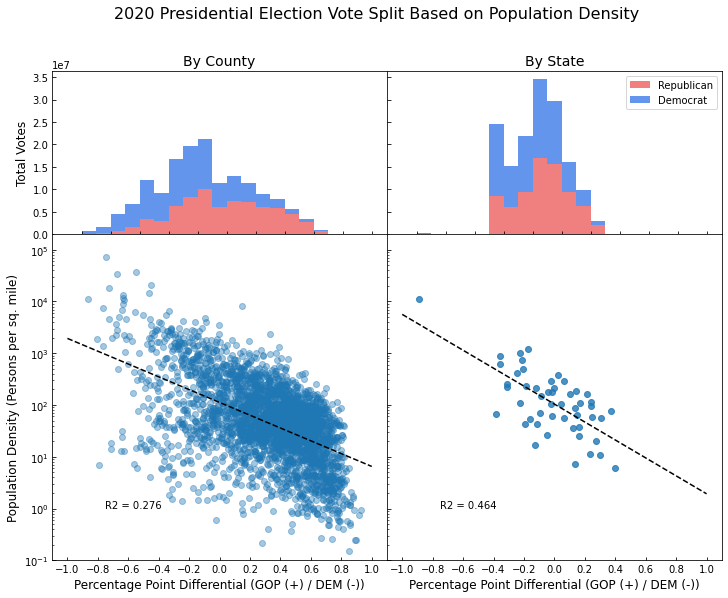

In [207]:
plt.figure(figsize=[12,9])
plt.suptitle('2020 Presidential Election Vote Split Based on Population Density', fontsize=16)
gspec = gridspec.GridSpec(3,2)
left_hist = plt.subplot(gspec[0,0],sharex=left_scatter, sharey=right_hist)
right_hist = plt.subplot(gspec[0,1],sharex=right_scatter)
left_scatter = plt.subplot(gspec[1:,0])
right_scatter = plt.subplot(gspec[1:,1],sharey=left_scatter)


# Calculate total votes based on percentage point difference:
point_range_county = []
point_range_votes_county_gop = []
point_range_votes_county_dem = []
point_range_state = []
point_range_votes_state_gop = []
point_range_votes_state_dem = []
for x in np.arange(-1.,1.,0.1).round(1):
    votes_by_popden_gop = np.sum(df_county.votes_gop[(df_county.per_point_diff >= x) & 
                                                       (df_county.per_point_diff < x + 0.1)])
    votes_by_popden_dem = np.sum(df_county.votes_dem[(df_county.per_point_diff >= x) & 
                                                       (df_county.per_point_diff < x + 0.1)])
    point_range_county.append(x-0.05)
    point_range_votes_county_gop.append(votes_by_popden_gop)
    point_range_votes_county_dem.append(votes_by_popden_dem)
    votes_by_popden_gop = np.sum(df_state.votes_gop[(df_state.per_point_diff >= x) & 
                                                       (df_state.per_point_diff < x + 0.1)])
    votes_by_popden_dem = np.sum(df_state.votes_dem[(df_state.per_point_diff >= x) & 
                                                       (df_state.per_point_diff < x + 0.1)])
    point_range_state.append(x-0.05)
    point_range_votes_state_gop.append(votes_by_popden_gop)
    point_range_votes_state_dem.append(votes_by_popden_dem)

for charts in [left_hist,right_hist,left_scatter,right_scatter]:
    charts.set_xticks(np.arange(-1.,1.2,0.2).round(1))
    charts.tick_params(axis='both', which='both', direction='in')
    #charts.set_xlim(-1,1)
    
for rights in [right_hist,right_scatter]:
    rights.tick_params(axis='y',labelleft=False)
    
for tops in [left_hist,right_hist]:
    tops.tick_params(axis='x',labelbottom=False)
    
# Set options for top left chart
left_hist.bar(point_range_county, point_range_votes_county_gop,width=0.1, color='lightcoral',label='Republican');
left_hist.bar(point_range_county, point_range_votes_county_dem,width=0.1, bottom=point_range_votes_county_gop, 
              color='cornflowerblue', label='Democrat');
#left_hist.legend()
left_hist.set_ylabel('Total Votes',fontsize=12)
left_hist.set_title('By County',fontsize=14)

# Set options for top right chart
right_hist.bar(point_range_state, point_range_votes_state_gop,width=0.1, color='lightcoral',label='Republican');
right_hist.bar(point_range_state, point_range_votes_state_dem,width=0.1, bottom=point_range_votes_state_gop, 
              color='cornflowerblue', label='Democrat');
right_hist.legend()
right_hist.set_title('By State',fontsize=14)

# Set options for bottom left chart
left_scatter.scatter(df_county.per_point_diff,df_county.pop_density,alpha=0.4);
left_scatter.set_yscale('log')
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_county.per_point_diff,np.log10(df_county.pop_density))
x = np.linspace(-1, 1)
y = 10**(slope*x + intercept)
left_scatter.plot(x,y,'--',c='black');
left_scatter.text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))
left_scatter.set_ylabel('Population Density (Persons per sq. mile)',fontsize=12)
left_scatter.set_xlabel('Percentage Point Differential (GOP (+) / DEM (-))',fontsize=12)
left_scatter.set_ylim(0.1,200000)

# Set options for bottom right chart
right_scatter.scatter(df_state.per_point_diff,df_state.pop_density, alpha=0.8);
right_scatter.set_yscale('log')
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_state.per_point_diff,np.log10(df_state.pop_density))
x = np.linspace(-1, 1)
y = 10**(slope*x + intercept)
right_scatter.plot(x,y,'--',c='black');
right_scatter.text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))
right_scatter.set_xlabel('Percentage Point Differential (GOP (+) / DEM (-))',fontsize=12)

plt.subplots_adjust(wspace=0,hspace=0)

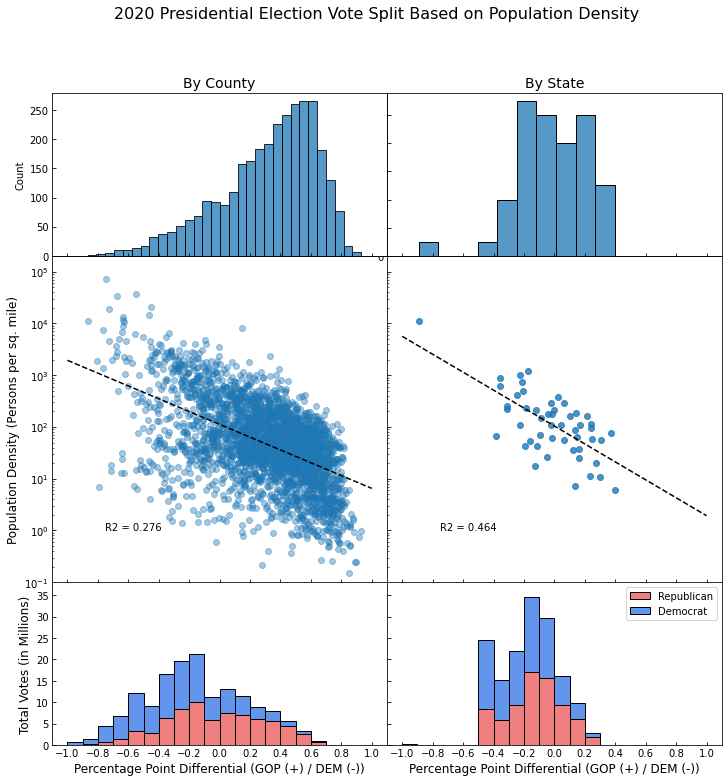

In [239]:
plt.figure(figsize=[12,12])
plt.suptitle('2020 Presidential Election Vote Split Based on Population Density', fontsize=16)
gspec = gridspec.GridSpec(4,2)
left_scatter = plt.subplot(gspec[1:3,0])
right_scatter = plt.subplot(gspec[1:3,1],sharey=left_scatter,sharex=left_scatter)
right_hist = plt.subplot(gspec[0,1],sharex=right_scatter)
left_hist = plt.subplot(gspec[0,0],sharex=left_scatter)
left_bar = plt.subplot(gspec[3,0],sharex=left_scatter)
right_bar = plt.subplot(gspec[3,1],sharex=right_scatter, sharey=left_bar)


# Calculate total votes based on percentage point difference:
point_range_county = []
point_range_votes_county_gop = []
point_range_votes_county_dem = []
point_range_state = []
point_range_votes_state_gop = []
point_range_votes_state_dem = []
for x in np.arange(-1.,1.,0.1).round(1):
    votes_by_popden_gop = np.sum(df_county.votes_gop[(df_county.per_point_diff >= x) & 
                                                       (df_county.per_point_diff < x + 0.1)])
    votes_by_popden_dem = np.sum(df_county.votes_dem[(df_county.per_point_diff >= x) & 
                                                       (df_county.per_point_diff < x + 0.1)])
    point_range_county.append(x-0.05)
    point_range_votes_county_gop.append(votes_by_popden_gop/10**6)
    point_range_votes_county_dem.append(votes_by_popden_dem/10**6)
    votes_by_popden_gop = np.sum(df_state.votes_gop[(df_state.per_point_diff >= x) & 
                                                       (df_state.per_point_diff < x + 0.1)])
    votes_by_popden_dem = np.sum(df_state.votes_dem[(df_state.per_point_diff >= x) & 
                                                       (df_state.per_point_diff < x + 0.1)])
    point_range_state.append(x-0.05)
    point_range_votes_state_gop.append(votes_by_popden_gop/10**6)
    point_range_votes_state_dem.append(votes_by_popden_dem/10**6)

for charts in [left_hist,right_hist,left_scatter,right_scatter,left_bar,right_bar]:
    charts.set_xticks(np.arange(-1.,1.2,0.2).round(1))
    charts.tick_params(axis='both', which='both', direction='in')
    #charts.set_xlim(-1,1)
    
for rights in [right_bar,right_scatter]:
    rights.tick_params(axis='y',labelleft=False)
    
for tops in [left_hist,right_hist]:
    tops.tick_params(axis='x',labelbottom=False)
    
# Set options for middle left chart
left_scatter.scatter(df_county.per_point_diff,df_county.pop_density,alpha=0.4);
left_scatter.set_yscale('log')
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_county.per_point_diff,np.log10(df_county.pop_density))
x = np.linspace(-1, 1)
y = 10**(slope*x + intercept)
left_scatter.plot(x,y,'--',c='black');
left_scatter.text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))
left_scatter.set_ylabel('Population Density (Persons per sq. mile)',fontsize=12)
#left_scatter.set_xlabel('Percentage Point Differential (GOP (+) / DEM (-))',fontsize=12)
left_scatter.set_ylim(0.1,200000)
left_scatter.set_xlim(-1.1,1.1)

# Set options for middle right chart
right_scatter.scatter(df_state.per_point_diff,df_state.pop_density, alpha=0.8);
right_scatter.set_yscale('log')
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_state.per_point_diff,np.log10(df_state.pop_density))
x = np.linspace(-1, 1)
y = 10**(slope*x + intercept)
right_scatter.plot(x,y,'--',c='black');
right_scatter.text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))
#right_scatter.set_xlabel('Percentage Point Differential (GOP (+) / DEM (-))',fontsize=12)
    
# Set options for top left chart
sns.histplot(ax=left_hist, x=df_county.per_point_diff)
left_hist.set_title('By County',fontsize=14)

# Set options for top right chart
sns.histplot(ax=right_hist, x=df_state.per_point_diff,bins=10)
right_hist.set_title('By State',fontsize=14)

# Set options for bottom left chart
left_bar.bar(point_range_county, point_range_votes_county_gop,width=0.1, color='lightcoral',label='Republican',
            edgecolor='black');
left_bar.bar(point_range_county, point_range_votes_county_dem,width=0.1, bottom=point_range_votes_county_gop, 
              color='cornflowerblue', label='Democrat', edgecolor='black');
left_bar.set_ylabel('Total Votes (in Millions)',fontsize=12)
left_bar.set_ylim(0,38)
left_bar.set_xlabel('Percentage Point Differential (GOP (+) / DEM (-))',fontsize=12)


# Set options for bottom right chart
right_bar.bar(point_range_state, point_range_votes_state_gop,width=0.1, color='lightcoral',label='Republican',
             edgecolor='black');
right_bar.bar(point_range_state, point_range_votes_state_dem,width=0.1, bottom=point_range_votes_state_gop, 
              color='cornflowerblue', label='Democrat', edgecolor='black');
right_bar.legend()
right_bar.set_xlabel('Percentage Point Differential (GOP (+) / DEM (-))',fontsize=12)

plt.subplots_adjust(wspace=0,hspace=0)

Text(-0.75, 1, 'R2 = 0.464')

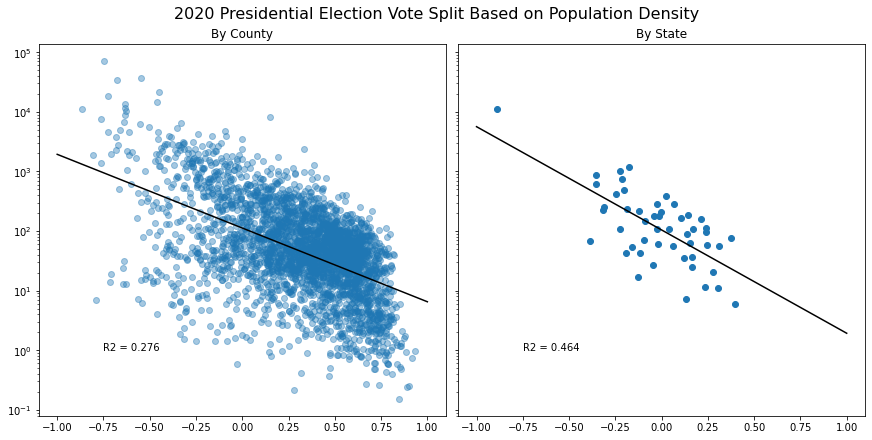

In [110]:
## plt.figure(figsize=[12,6])
fig, axs = plt.subplots(1,2, constrained_layout=True, sharey=True)

fig.set_figheight(6)
fig.set_figwidth(12)
fig.suptitle('2020 Presidential Election Vote Split Based on Population Density', fontsize=16)


axs[0].scatter(df_county.per_point_diff,df_county.pop_density, alpha=0.4)
axs[0].set_yscale('log')
axs[0].set_title('By County')
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_county.per_point_diff,np.log10(df_county.pop_density))
x = np.linspace(-1, 1)
y = 10**(slope*x + intercept)
axs[0].plot(x,y,c='black')
axs[0].text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))

axs[1].scatter(df_state.per_point_diff,df_state.pop_density)
axs[1].set_yscale('log')
axs[1].set_title('By State')
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_state.per_point_diff,np.log10(df_state.pop_density))
x = np.linspace(-1, 1)
y = 10**(slope*x + intercept)
axs[1].plot(x,y,c='black')
axs[1].text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))


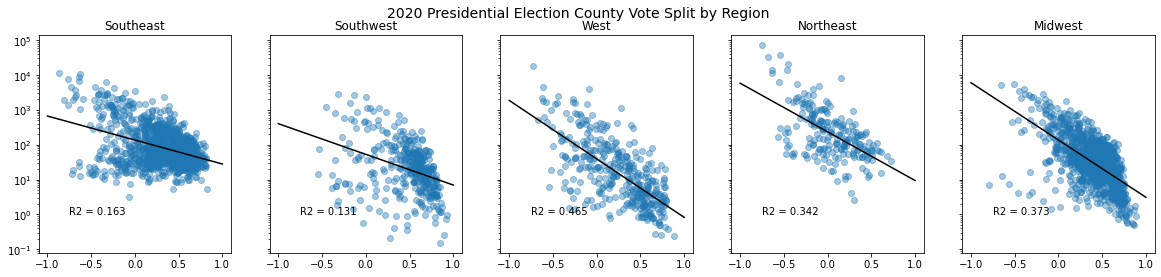

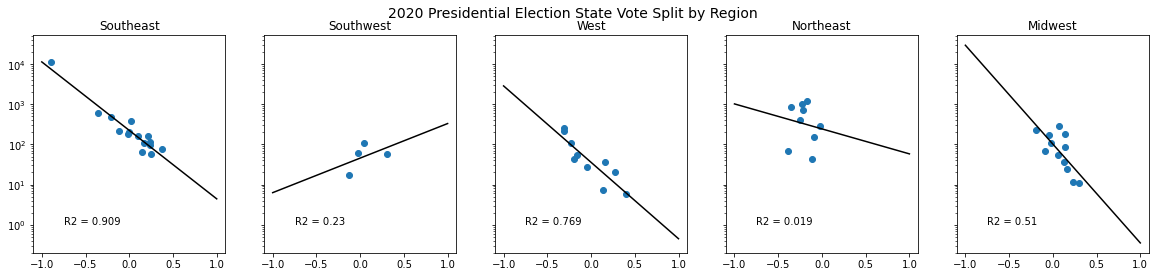

In [209]:
#plt.figure(figsize=[12,12])

fig, axs = plt.subplots(1,5, sharey=True)
fig.set_figheight(4)
fig.set_figwidth(20)
fig.suptitle('2020 Presidential Election County Vote Split by Region', fontsize=14)

region_list = df_county.region.unique()

for i in range(len(region_list)):
    reg = region_list[i]
    axs[i].scatter(df_county[df_county.region == reg]['per_point_diff'], 
                   df_county[df_county.region == reg]['pop_density'],
                  alpha=0.4)
    axs[i].set_yscale('log')
    axs[i].set_title(region_list[i])
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_county[df_county.region == reg]['per_point_diff'],
                                                                      np.log10(df_county[df_county.region == reg]['pop_density']))
    x = np.linspace(-1, 1)
    y = 10**(slope*x + intercept)
    axs[i].plot(x,y,c='black')
    axs[i].text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))

fig, axs = plt.subplots(1,5,sharey=True)
fig.set_figheight(4)
fig.set_figwidth(20)
fig.suptitle('2020 Presidential Election State Vote Split by Region', fontsize=14)

region_list = df_county.region.unique()

for i in range(len(region_list)):
    reg = region_list[i]
    axs[i].scatter(df_state[df_state.region == reg]['per_point_diff'], 
                   df_state[df_state.region == reg]['pop_density'])
    axs[i].set_yscale('log')
    axs[i].set_title(region_list[i])
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df_state[df_state.region == reg]['per_point_diff'],
                                                                      np.log10(df_state[df_state.region == reg]['pop_density']))
    x = np.linspace(-1, 1)
    y = 10**(slope*x + intercept)
    axs[i].plot(x,y,c='black')
    axs[i].text(-0.75, 1, ('R2 = ' + str(round(rvalue**2,3))))

<AxesSubplot:xlabel='per_point_diff', ylabel='Count'>

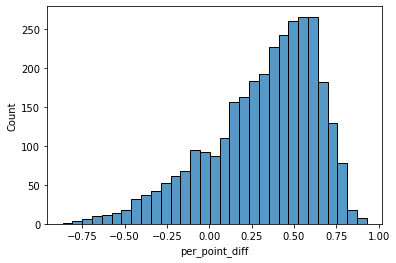

In [13]:
sns.histplot(df_county.per_point_diff)

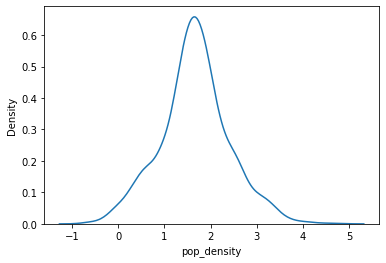

In [14]:
plt.figure()
sns.kdeplot(np.log10(df_county.pop_density))
ax = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim([0,10000])
#df_state['total_votes'].plot.kde()

#sns.histplot(df_county.pop_density, bins=10000)#, bins=np.logspace(np.log10(10**5),np.log10(10**8),30));
#ax = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim([0,100])
#ax.set_ylim([0,100])

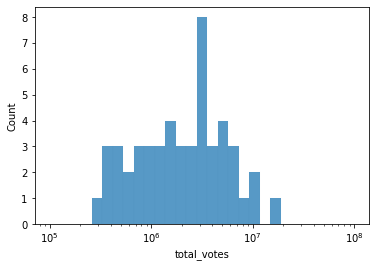

In [15]:
plt.figure()
ax = plt.gca()
sns.histplot(df_state.total_votes, bins=np.logspace(np.log10(10**5),np.log10(10**8),30));
ax.set_xscale('log')


<AxesSubplot:xlabel='pop_density', ylabel='Density'>

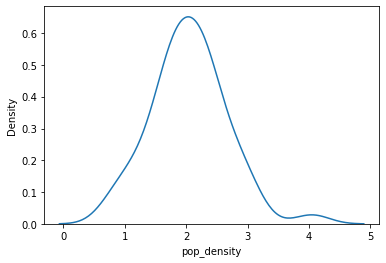

In [16]:
plt.figure()
sns.kdeplot(np.log10(df_state.pop_density))
#ax = plt.gca()
#ax.set_xscale('log')
#df_state['total_votes'].plot.kde()


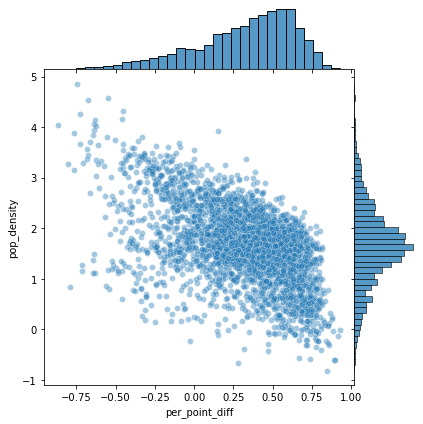

In [17]:
sns.jointplot(x=df_county.per_point_diff,y=np.log10(df_county.pop_density), alpha=0.4, space=0)